In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 

class Layer:
    def __init__(self,W,b,f):
        self._W = W
        self._b = b
        self._f = f
    def input(self,x):
        return (np.dot(self._W, x) + self._b)
    def forward(self,x):
        return (self._f(np.dot(self._W,x) + self._b))
    
def sigmoid(u):
    return 1/(1+np.exp(-u))

def d_sigmoid(y):
    return y * (1 - y)

def ReLU(u):
    return u * (u > 0) 

def d_ReLU(y):
    return 1. * (y > 0)

def SE(T,z):
    return np.dot((T - z).T, T - z).flatten()[0]/2

def d_SE(t, y):
    return -(t - y)

def backpropagation(output_data, training_data, input_data, output_layer, input_layer, input_layer_forward_prop):
    delta_output = d_SE(training_data, output_data) * d_sigmoid(output_data)
    delta_input = np.dot(output_layer._W.T, delta_output) * d_sigmoid(input_layer_forward_prop)

    d_W_output = np.dot(delta_output, input_layer_forward_prop.T)
    output_layer._W -= epsilon * d_W_output
    output_layer._b -= epsilon * delta_output

    d_W_input = np.dot(delta_input, input_data.T)
    input_layer._W -= epsilon * d_W_input
    input_layer._b -= epsilon * delta_input

epsilon = 0.1

Training set has 40001 rows and 785 columns
Test set has 2000 rows and 785 columns
(40001, 785)


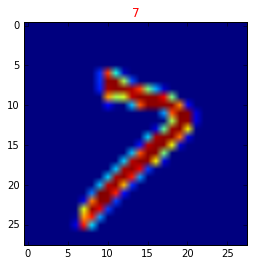

In [2]:
mnist_data = pd.read_csv("../input/train.csv")
mnist_shuffle = mnist_data.reindex(np.random.permutation(mnist_data.index)).reset_index(drop=True)
train = mnist_shuffle.ix[:40000]
test = mnist_shuffle.ix[40000:]

print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))
print (train.shape)

train_label = train.label
train_data = train.ix[: , 1: ]
test_label = test.label
test_data = test.ix[: , 1: ]

num = 200
image = np.array(train_data[num:num + 1]).reshape(28,28)
plt.imshow(image)
plt.title(train_label[num], color='red')

In [3]:
#encoder dimention
input_dim = 784
hidden1_dim = 100
hidden2_dim = 10
hidden3_dim = 2
hidden4_dim = 10
hidden5_dim = 100
output_dim = 784

W1 = np.random.randn(hidden1_dim, input_dim)
b1 = np.random.randn(hidden1_dim, 1)
L1 = Layer(W1, b1, sigmoid)

W2 = np.random.randn(hidden2_dim, hidden1_dim)
b2 = np.random.randn(hidden2_dim, 1)
L2 = Layer(W2, b2, sigmoid)

W3 = np.random.randn(hidden3_dim, hidden2_dim)
b3 = np.random.randn(hidden3_dim, 1)
L3 = Layer(W3, b3, sigmoid)

W4 = np.random.randn(hidden4_dim, hidden3_dim)
b4 = np.random.randn(hidden4_dim, 1)
L4 = Layer(W4, b4, sigmoid)

W5 = np.random.randn(hidden5_dim, hidden4_dim)
b5 = np.random.randn(hidden5_dim, 1)
L5 = Layer(W5, b5, sigmoid)

W6 = np.random.randn(output_dim, hidden5_dim)
b6 = np.random.randn(output_dim, 1)
L6 = Layer(W6, b6, sigmoid)


train_error:23.034795527, test_error:17.4903616753
train_error:15.9416904735, test_error:14.7770660409
train_error:14.8199033785, test_error:12.9124282082
train_error:13.4736356532, test_error:12.8925906315
train_error:13.1559056944, test_error:13.1608164189
train_error:12.9870993198, test_error:15.2999685184
train_error:12.7919297434, test_error:11.0813362199
train_error:12.0426971348, test_error:12.9656134794
train_error:11.7265967095, test_error:10.7393051053
train_error:11.3991726893, test_error:12.402172677
train_error:11.078478698, test_error:11.2557664224
train_error:10.8032766428, test_error:9.55598666606
train_error:10.6081243211, test_error:12.2565796518
train_error:10.4522046149, test_error:10.6639287496
train_error:10.1504051006, test_error:9.90322287667
train_error:9.75630041739, test_error:12.2067815896
train_error:9.62649503361, test_error:9.28889739247
train_error:9.19649172231, test_error:8.75076192624
train_error:8.8865879103, test_error:9.82336612024
train_error:8.76

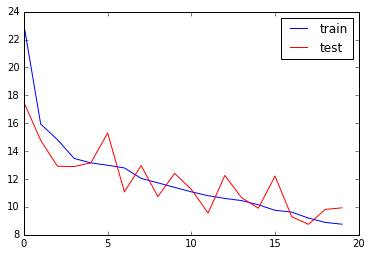

In [4]:
history_train_SE = []
history_test_SE = []
train_error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[:, 1:]
train_data = np.float32(train_data)/255
test_input = test_data
test_input = test_input/255
a = 0
for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[:, 1:]
    train_data = np.float32(train_data)/255
    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration:iteration + 1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y6 = L6.forward(Y1)
        train_error += SE(t, Y6)
        #back propagation
        backpropagation(Y6, t, X, L6, L1, Y1)
        
    Y1 = L1.forward(test_input.T)
    Y6 = L6.forward(Y1)
    test_error = SE(test_input.T, Y6)
    history_test_SE.append(test_error)
    
    train_error = train_error/train_len
    history_train_SE.append(train_error)
    print("train_error:%s, test_error:%s"%(error, test_error))
    error = 0
    
    
plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

train_error:3.33515983202, test_error:3.13882792842
train_error:2.87963427493, test_error:2.2846909623
train_error:2.85114417325, test_error:2.11385260422
train_error:2.84694258089, test_error:1.8115344522
train_error:2.84471166177, test_error:1.75277850637
train_error:2.84330127377, test_error:1.98981933141
train_error:2.84144019038, test_error:1.91289252325
train_error:2.84236420344, test_error:2.03006107751
train_error:2.84250460736, test_error:1.90036624833
train_error:2.84237993019, test_error:1.87261379843
train_error:2.84267369141, test_error:2.03255973566
train_error:2.84383362885, test_error:2.06616781778
train_error:2.84241919748, test_error:1.94235950564
train_error:2.84326570683, test_error:2.14804954062
train_error:2.84312141425, test_error:2.01865458219
train_error:2.84340703024, test_error:1.86525483663
train_error:2.84281874983, test_error:1.8835705185
train_error:2.84233326433, test_error:2.17115112001
train_error:2.84245973144, test_error:1.86099205857
train_error:2.8

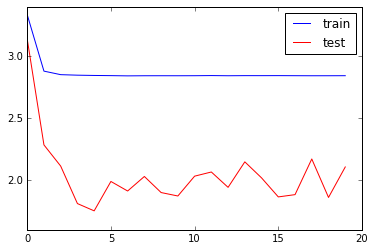

In [6]:
history_train_SE = []
history_test_SE = []
error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255

for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255
    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y2 = L2.forward(Y1)
        Y5 = L5.forward(Y2)
        error += SE(Y1, Y5)
        #back propagation
        backpropagation(Y5, Y1, Y1, L5, L2, Y2)

    Y1 = L1.forward(test_input.T)
    Y2 = L2.forward(Y1)
    Y5 = L5.forward(Y2)
    
    test_error = SE(Y1, Y5)
    history_test_SE.append(test_error)
    
    error = error/train_len
    history_train_SE.append(error)
    print("train_error:%s, test_error:%s"%(error, test_error))
    error = 0
    
    
plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

train_error:0.27069985242, test_error:0.593104971637
train_error:0.24628467637, test_error:0.135001012065
train_error:0.243455655955, test_error:0.246103053312
train_error:0.242124261252, test_error:0.474303066278
train_error:0.241104281982, test_error:0.187298497806
train_error:0.240636127361, test_error:0.23886364171
train_error:0.240167301505, test_error:0.283947778669
train_error:0.239955655036, test_error:0.0782395262776
train_error:0.239688242446, test_error:0.217977445824
train_error:0.239409465148, test_error:0.0980173546239
train_error:0.239165561536, test_error:0.266258460668
train_error:0.23882185636, test_error:0.273123791127
train_error:0.238573627941, test_error:0.0549624621001
train_error:0.238151220835, test_error:0.128332892511
train_error:0.237876217429, test_error:0.28074618437
train_error:0.237519780572, test_error:0.204694749349
train_error:0.237297047899, test_error:0.170834249715
train_error:0.23704020325, test_error:0.114772966978
train_error:0.236845188445, tes

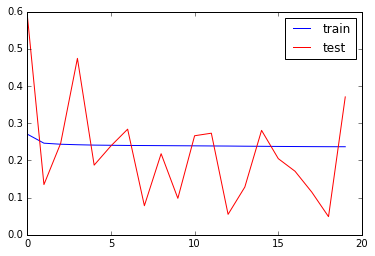

In [48]:
history_train_SE = []
history_test_SE = []
train_error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255

for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255
    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y2 = L2.forward(Y1)
        Y3 = L3.forward(Y2)
        Y4 = L4.forward(Y3)
        train_error += SE(Y2, Y4)
        #backpropagation(Y6, t, X, L6, L1, Y1)
        #backpropagation(Y5, Y1, Y1, L5, L2, Y2)
        backpropagation(Y4, Y2, Y2, L4, L3, Y3)
        
    Y1 = L1.forward(X)
    Y2 = L2.forward(Y1)
    Y3 = L3.forward(Y2)
    Y4 = L4.forward(Y3)
    
    test_error = SE(Y2, Y4)
    history_test_SE.append(test_error)
    
    train_error = train_error/train_len
    history_train_SE.append(train_error)
    print("train_error:%s, test_error:%s"%(train_error, test_error))
    train_error = 0
    
plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

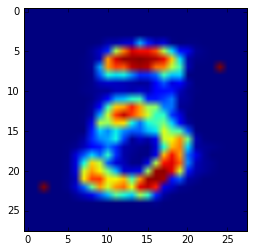

In [53]:
i = 32

length =40
random = np.int(np.random.rand() * length)
X = train_data[random: random+1].reshape(784, 1)

Y1 = L1.forward(X)
Y2 = L2.forward(Y1)
Y3 = L3.forward(Y2)
Y4 = L4.forward(Y3)
Y5 = L5.forward(Y4)
Y6 = L6.forward(Y5)
a = Y6.reshape(28,28)
plt.imshow(a)


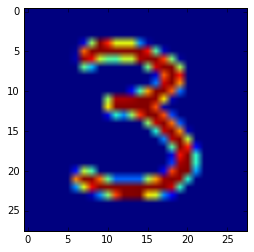

In [54]:
input_image = train_data[random: random+1].reshape(28, 28)
plt.imshow(input_image)